In [0]:
from google.colab import files
uploadedFile = files.upload() # UPLOADING FILES TO COLAB

In [0]:
import pandas as pd
import numpy as np
import cv2
import urllib.request
import io
import os,sys
from PIL import Image
from google.colab.patches import cv2_imshow
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.utils import shuffle
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import dlib
import random
import csv

Using TensorFlow backend.


In [0]:
# PROCESSING JSON

data = pd.read_json('Face_Recognition.json',lines = True) # STORE CONTENT OF JSON FILE IN "DATA"

features = []
tempNP = []
for num in range(len(data)):                                 # ITERATE THROUGH DATA IN JSON AND STORE THEM IN LIST
  URL = data["content"][num]
  with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())
  pil_image = Image.open(f).convert('RGB')
  frame = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
  for i in data['annotation'][num]:
    if ( len(i['label']) < 4 or i['label'][0] == 'Not_Face' ):
      continue
    if "Age" in i['label'][0]:
      age = i['label'][0].split('Age_')[1].strip()
      emotion = i['label'][1].split('_')[1].strip()
    else:      
      emotion = i['label'][0].split('_')[1].strip()
      age = i['label'][1].split('Age_')[1].strip()
    ethnicity = i['label'][2].split('_')[1].strip()
    gender = i['label'][3].split('_')[1].strip()
    startX = int(round(i['points'][0]['x'] * i['imageWidth']))
    startY = int(round(i['points'][0]['y'] * i['imageHeight']))
    endX = int(round(i['points'][1]['x'] * i['imageWidth']))
    endY = int(round(i['points'][1]['y'] * i['imageHeight']))
    roi = frame[startY:endY,startX:endX]                            # CUTTING THE FACES FROM COMPLETE PICTURE
    npImage = np.array(roi,'float32')         
    npImage /= 255
    npImage = cv2.resize(npImage,(48,48))
    tempNP.append(npImage)
    values = [emotion,age,ethnicity,gender]
    features.append(values)


images = np.array(tempNP) # CONVERT THE LIST TO NUMPY ARRAY

In [0]:
features = np.array(features)             # CONVERT FEATURES LIST TO NUMPY ARRAY


In [0]:
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(features)            # ONE HOT ENCODING IS DONE ON FEATURES ARRAY (Eg: Happy 20-30 below20 .....)
                                                #                                                   1     1      0     ......

In [0]:
images, labels = shuffle(images,labels,random_state=2)        # SHUFFLE THE DATA

X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=42, test_size=0.1)     # splitting for training and testing.

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(19, activation='sigmoid'))

NameError: ignored

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=2)      #epoch = number of iterations



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 178 samples, validate on 20 samples
Epoch 1/20
178/178 [==============================] - 7s 41ms/step - loss: 0.4365 - acc: 0.7809 - val_loss: 0.3869 - val_acc: 0.8105
Epoch 2/20
178/178 [==============================] - 0s 3ms/step - loss: 0.3999 - acc: 0.8066 - val_loss: 0.3714 - val_acc: 0.8000
Epoch 3/20
178/178 [==============================] - 0s 3ms/step - loss: 0.3927 - acc: 0.8007 - val_loss: 0.3909 - val_acc: 0.7895
Epoch 4/20
178/178 [==============================] - 0s 3ms/step - loss: 0.3920 - acc: 0.8060 - val_loss: 0.3785 - val_acc: 0.8000
Epoch 5/20
178/178 [==============================] - 0s 3ms/step - loss: 0.3881 - acc: 0.8019 - val_loss: 0.3839 - val_acc: 0.8026
Epoch 6/20
178/178 [==============================] - 0s 3ms/step - loss: 0.3880 - acc: 0.8087 - val_loss: 0.3747 - val_acc: 0.8000
Epoch 7/20
178/178 [==============================] - 0s 3ms/step - loss: 0.3848 - acc: 0.8031 - val_loss: 0.3764 - val_acc: 0.8132
Epoch 8/20
178/178 [==========

In [0]:
image = cv2.imread('example.jpeg') # testing input image

if image is None:
    print("Could not read input image")
    exit()

cnn_face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat') # pretrained model for human face detection

faces_cnn = cnn_face_detector(image, 1)

for face in faces_cnn: # get bounding box coordinates
    x = face.rect.left()
    x = int(x - (0.1 * x))
    y = face.rect.top()
    y = int(y - (0.15 * y))
    x2 = face.rect.right()
    x2 = int(x2 + (0.1 * x2))
    y2 = face.rect.bottom()
    y2 = int(y2 + (0.1 * y2))

    roi = image[y:y2,x:x2] # extract face from complete picture
    cv2.imwrite(os.path.join('face'+str(int(random.random()*10))+'.jpg'), roi) # saving the face with "face<randomnumber>"


Could not read input image


TypeError: ignored

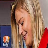

Female 80.42693138122559
Neutral 70.29515504837036
White 60.82105040550232
20_30 48.38664531707764


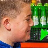

Neutral 99.99656677246094
Asian 99.68774318695068
below20 94.90188360214233
Male 81.43944144248962


In [0]:
files = os.listdir('/content') # getting all files in /content folder of google colab
for file in files:
  if file[:4] == 'face': # we saved our image of faces with name as "face<randomnumber>" 
    img = cv2.imread(file)
    img = np.array(cv2.resize(img,(48,48)),'float32') # cnn accepts only 96x96 image
    cv2_imshow(img)
    img = img/255 # standardization
    
    classes = np.array(mlb.classes_) # it contains all the labels of our class
    proba = model.predict(img.reshape(1,48,48,3)) # prediction takes place here
    top_3 = np.argsort(proba[0])[:-5:-1] 
    for i in range(4):
      print(classes[top_3[i]],proba[0][top_3[i]]*100) # display all possibilities with percentage


    